### Data uploading and preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import dask.dataframe as dd
import random
random.seed(42)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

sns.set(context='notebook', style='whitegrid', palette="Dark2", font='sans-serif', font_scale=1, color_codes=True, rc=None)


In [3]:
cols = list(range(1, 5411))
#df = dd.read_csv('./K9.data',low_memory=False)
df = dd.read_csv('./K9.data', header=None, names=cols, low_memory=False)

In [5]:
#cols = list(range(1, 5411))
#df = dd.read_csv('./K9.data',low_memory=False)
df = dd.read_csv('./K8.data', header=None, low_memory=False)

I had to use Dask package since data was to large to read with Pandas.

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,5400,5401,5402,5403,5404,5405,5406,5407,5408,5409
0,-0.161,-0.014,0.002,-0.036,-0.033,-0.093,0.025,0.005,0.000,-0.015,...,0.013,0.021,0.02,0.016,-0.011,0.003,0.01,-0.007,inactive,NaN
1,-0.158,-0.002,-0.012,-0.025,-0.012,-0.106,0.013,0.005,0.000,-0.002,...,-0.008,0.007,0.015,-0.008,-0.011,-0.004,0.013,0.005,inactive,NaN
2,?,?,?,?,?,?,?,?,?,?,...,?,?,?,?,?,?,?,?,inactive,NaN
3,-0.169,-0.025,-0.010,-0.041,-0.045,-0.069,0.038,0.014,0.008,-0.014,...,0.01,0.025,0.025,0.021,-0.012,0.006,0.016,-0.018,inactive,NaN
4,-0.183,-0.051,-0.023,-0.077,-0.092,-0.015,0.071,0.027,0.020,-0.019,...,0.012,0.05,0.038,0.051,-0.015,0.017,0.027,-0.049,inactive,NaN


In [7]:
df2 = df.drop(5409, axis=1)

In [8]:
y = df2[5408]

In [9]:
y = y.astype('category')

In [10]:
y = y.replace({'active': 1, 'inactive': 0}).astype('int8')

In [11]:
y = y.compute()

In [12]:
y = pd.DataFrame(y)

In [13]:
y[5408].value_counts()

0    16629
1      143
Name: 5408, dtype: int64

In [14]:
(y == 0).sum()/(y == 1).sum()

5408    116.286713
dtype: float64

Target classes are highly imbalanced (label [0] is about 206 times more frequent than label [1]).

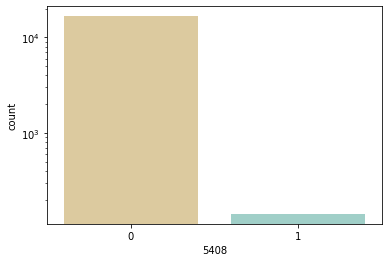

In [15]:
sns.countplot(x=y[5408], data=y, palette='BrBG')
plt.yscale("log")

In [18]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,5399,5400,5401,5402,5403,5404,5405,5406,5407,5408
0,-0.161,-0.014,0.002,-0.036,-0.033,-0.093,0.025,0.005,0.000,-0.015,...,0.006,0.013,0.021,0.02,0.016,-0.011,0.003,0.01,-0.007,inactive
1,-0.158,-0.002,-0.012,-0.025,-0.012,-0.106,0.013,0.005,0.000,-0.002,...,0.002,-0.008,0.007,0.015,-0.008,-0.011,-0.004,0.013,0.005,inactive
2,?,?,?,?,?,?,?,?,?,?,...,?,?,?,?,?,?,?,?,?,inactive
3,-0.169,-0.025,-0.010,-0.041,-0.045,-0.069,0.038,0.014,0.008,-0.014,...,0.019,0.01,0.025,0.025,0.021,-0.012,0.006,0.016,-0.018,inactive
4,-0.183,-0.051,-0.023,-0.077,-0.092,-0.015,0.071,0.027,0.020,-0.019,...,0.051,0.012,0.05,0.038,0.051,-0.015,0.017,0.027,-0.049,inactive


In [19]:
df3 = df2.drop(5408, axis=1)

In [20]:
y.describe()

,5408
count,16772.000000
mean,0.008526
std,0.091945
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [21]:
df3.head()

,0,1,2,3,4,5,6,7,8,9,...,5398,5399,5400,5401,5402,5403,5404,5405,5406,5407
0,-0.161,-0.014,0.002,-0.036,-0.033,-0.093,0.025,0.005,0.000,-0.015,...,-0.015,0.006,0.013,0.021,0.02,0.016,-0.011,0.003,0.01,-0.007
1,-0.158,-0.002,-0.012,-0.025,-0.012,-0.106,0.013,0.005,0.000,-0.002,...,-0.007,0.002,-0.008,0.007,0.015,-0.008,-0.011,-0.004,0.013,0.005
2,?,?,?,?,?,?,?,?,?,?,...,?,?,?,?,?,?,?,?,?,?
3,-0.169,-0.025,-0.010,-0.041,-0.045,-0.069,0.038,0.014,0.008,-0.014,...,-0.016,0.019,0.01,0.025,0.025,0.021,-0.012,0.006,0.016,-0.018
4,-0.183,-0.051,-0.023,-0.077,-0.092,-0.015,0.071,0.027,0.020,-0.019,...,-0.028,0.051,0.012,0.05,0.038,0.051,-0.015,0.017,0.027,-0.049


In [22]:
df3 = df3.replace('?', np.nan)

In [23]:
df4 = df3.astype('float16')

In [24]:
df4.head()

,0,1,2,3,4,5,6,7,8,9,...,5398,5399,5400,5401,5402,5403,5404,5405,5406,5407
0,-0.161011,-0.014000,0.002001,-0.036011,-0.032990,-0.093018,0.024994,0.005001,0.000000,-0.014999,...,-0.014999,0.006001,0.013000,0.020996,0.020004,0.016006,-0.011002,0.003000,0.010002,-0.007000
1,-0.157959,-0.002001,-0.012001,-0.024994,-0.012001,-0.106018,0.013000,0.005001,0.000000,-0.002001,...,-0.007000,0.002001,-0.008003,0.007000,0.014999,-0.008003,-0.011002,-0.004002,0.013000,0.005001
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.168945,-0.024994,-0.010002,-0.040985,-0.045013,-0.068970,0.037994,0.014000,0.008003,-0.014000,...,-0.016006,0.018997,0.010002,0.024994,0.024994,0.020996,-0.012001,0.006001,0.016006,-0.018005
4,-0.182983,-0.050995,-0.022995,-0.077026,-0.091980,-0.014999,0.070984,0.026993,0.020004,-0.018997,...,-0.028000,0.050995,0.012001,0.049988,0.037994,0.050995,-0.014999,0.016998,0.026993,-0.049011


In [25]:
df5 = df4.compute()

In [26]:
df5.iloc[2,:].isna().sum()

5408

In [27]:
df5.T.isna().sum()[df5.T.isna().sum() > 0].value_counts()

4826    123
5408     57
dtype: int64

In [28]:
df5 = pd.concat([df5,y], axis=1)

In [33]:
df5.head()

,0,1,2,3,4,5,6,7,8,9,...,5399,5400,5401,5402,5403,5404,5405,5406,5407,5408
0,-0.161011,-0.014000,0.002001,-0.036011,-0.032990,-0.093018,0.024994,0.005001,0.000000,-0.014999,...,0.006001,0.013000,0.020996,0.020004,0.016006,-0.011002,0.003000,0.010002,-0.007000,0.0
1,-0.157959,-0.002001,-0.012001,-0.024994,-0.012001,-0.106018,0.013000,0.005001,0.000000,-0.002001,...,0.002001,-0.008003,0.007000,0.014999,-0.008003,-0.011002,-0.004002,0.013000,0.005001,0.0
3,-0.168945,-0.024994,-0.010002,-0.040985,-0.045013,-0.068970,0.037994,0.014000,0.008003,-0.014000,...,0.018997,0.010002,0.024994,0.024994,0.020996,-0.012001,0.006001,0.016006,-0.018005,0.0
4,-0.182983,-0.050995,-0.022995,-0.077026,-0.091980,-0.014999,0.070984,0.026993,0.020004,-0.018997,...,0.050995,0.012001,0.049988,0.037994,0.050995,-0.014999,0.016998,0.026993,-0.049011,0.0
5,-0.154053,0.005001,-0.011002,-0.013000,-0.002001,-0.114990,0.005001,0.002001,-0.003000,0.002001,...,-0.011002,0.012001,0.009003,0.003000,-0.001000,0.002001,-0.006001,0.009003,0.013000,0.0


In [30]:
df5.loc[df5[5407].isna(), 5408] = np.nan

In [31]:
df5[5408].isna().sum()

57

In [32]:
df5 = df5.dropna(how='all')

I dropped 57 empty rows, since they contained no information. There is still 123 rows with np.nans left. Further investigation is needed to decide if I should drop or process them. 

In [34]:
df5.isna().sum(axis=1).loc[df5.isna().sum(axis=1) > 0]

16      4826
187     4826
189     4826
191     4826
192     4826
        ... 
291     4826
1734    4826
22      4826
391     4826
392     4826
Length: 123, dtype: int64

In [35]:
df5.isna().sum().sum()

593598

In [36]:
df5.isna().sum(axis=1).loc[df5.isna().sum(axis=1) > 0].unique()

array([4826])

In [37]:
4826/5408 * 100

89.23816568047337

- The remaining 123 rows with np.nans contain almost 90% missing values.
- All of the 123 rows with missing values contain exactly 4826 np.nans. There is a need to check if missing values are in the same columns. If yes, in which columns and can we explain why?

In [ ]:
#df5.loc[df5.isna().sum(axis=1).loc[df5.isna().sum(axis=1) > 0].index]

In [43]:
df5.iloc[:,:4826].isna().sum().sum()


593598

In [39]:
df5.iloc[:,4825:]

,4825,4826,4827,4828,4829,4830,4831,4832,4833,4834,...,5399,5400,5401,5402,5403,5404,5405,5406,5407,5408
0,-0.381104,0.022995,-0.001000,-0.018005,0.004002,-0.016006,0.014999,0.004002,0.053986,0.004002,...,0.006001,0.013000,0.020996,0.020004,0.016006,-0.011002,0.003000,0.010002,-0.007000,0.0
1,0.615234,0.010002,0.003000,0.008003,-0.003000,-0.008003,0.020996,0.012001,0.039001,0.006001,...,0.002001,-0.008003,0.007000,0.014999,-0.008003,-0.011002,-0.004002,0.013000,0.005001,0.0
3,-0.350342,0.016006,0.003000,-0.018005,0.006001,-0.014999,0.013000,0.006001,0.045990,0.000000,...,0.018997,0.010002,0.024994,0.024994,0.020996,-0.012001,0.006001,0.016006,-0.018005,0.0
4,-3.265625,0.010002,0.010002,-0.041992,0.011002,-0.029007,0.007000,-0.003000,0.057007,0.009003,...,0.050995,0.012001,0.049988,0.037994,0.050995,-0.014999,0.016998,0.026993,-0.049011,0.0
5,1.177734,0.011002,0.001000,0.014000,-0.001000,-0.003000,0.024002,0.012001,0.032990,-0.003000,...,-0.011002,0.012001,0.009003,0.003000,-0.001000,0.002001,-0.006001,0.009003,0.013000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,-1.083984,0.035004,-0.008003,-0.039001,0.006001,-0.016998,0.008003,0.004002,0.052002,-0.001000,...,0.020996,0.028000,0.036987,0.026993,0.039001,-0.013000,0.013000,0.011002,-0.026001,1.0
1117,0.728027,0.009003,0.002001,0.012001,0.000000,-0.005001,0.024994,0.010002,0.032990,-0.002001,...,-0.004002,-0.007000,0.000000,0.012001,-0.016006,-0.012001,-0.005001,0.011002,0.010002,1.0
1118,-3.896484,0.056000,-0.010002,-0.052002,0.006001,-0.018997,0.001000,0.003000,0.053986,-0.008003,...,0.010002,0.050995,0.042999,0.029999,0.057007,-0.009003,0.018997,0.005001,-0.026001,0.0
1119,-4.125000,0.020004,0.007000,-0.064026,0.011002,-0.036987,-0.004002,-0.009003,0.067017,0.012001,...,0.065979,0.026993,0.070007,0.048004,0.078003,-0.014000,0.022003,0.028000,-0.067017,0.0


In [42]:
df5.iloc[:,4826:].isna().sum().sum()


0

All np.nans are between columns 1-4826 which represent 2D electrostatic and surface based features.
There is no np.nan in columns 4827-5408 which represent 3D distance based feature. 
In my opinion I shouldn't drop these rows with np.nans for now, despite they contain almost 90% missing values, because they still contain important information 3D based features.

In [44]:
df5 = df5.fillna(df5.median())

In [45]:
df5.isna().sum().sum()

0

In [46]:
df5.shape

(16715, 5409)

In [47]:
y = df5[5408]

In [48]:
X = df5.drop(5408, axis=1)

In [49]:
y = y.astype('int8')

In [50]:
X = X.astype('float16')

In [52]:
y = y.reset_index()

In [53]:
X = X.reset_index()

In [55]:
X = X.drop('index', axis=1)
y = y.drop('index', axis=1)

In [57]:
X

,0,1,2,3,4,5,6,7,8,9,...,5398,5399,5400,5401,5402,5403,5404,5405,5406,5407
0,-0.161011,-0.014000,0.002001,-0.036011,-0.032990,-0.093018,0.024994,0.005001,0.000000,-0.014999,...,-0.014999,0.006001,0.013000,0.020996,0.020004,0.016006,-0.011002,0.003000,0.010002,-0.007000
1,-0.157959,-0.002001,-0.012001,-0.024994,-0.012001,-0.106018,0.013000,0.005001,0.000000,-0.002001,...,-0.007000,0.002001,-0.008003,0.007000,0.014999,-0.008003,-0.011002,-0.004002,0.013000,0.005001
2,-0.168945,-0.024994,-0.010002,-0.040985,-0.045013,-0.068970,0.037994,0.014000,0.008003,-0.014000,...,-0.016006,0.018997,0.010002,0.024994,0.024994,0.020996,-0.012001,0.006001,0.016006,-0.018005
3,-0.182983,-0.050995,-0.022995,-0.077026,-0.091980,-0.014999,0.070984,0.026993,0.020004,-0.018997,...,-0.028000,0.050995,0.012001,0.049988,0.037994,0.050995,-0.014999,0.016998,0.026993,-0.049011
4,-0.154053,0.005001,-0.011002,-0.013000,-0.002001,-0.114990,0.005001,0.002001,-0.003000,0.002001,...,0.026993,-0.011002,0.012001,0.009003,0.003000,-0.001000,0.002001,-0.006001,0.009003,0.013000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,-0.175049,-0.036011,0.005001,-0.049988,-0.065002,-0.040985,0.046997,0.012001,0.003000,-0.018997,...,-0.020004,0.020996,0.028000,0.036987,0.026993,0.039001,-0.013000,0.013000,0.011002,-0.026001
16711,-0.157959,-0.000000,-0.014999,-0.020996,-0.004002,-0.106018,0.010002,0.006001,0.001000,0.002001,...,-0.007000,-0.004002,-0.007000,0.000000,0.012001,-0.016006,-0.012001,-0.005001,0.011002,0.010002
16712,-0.173950,-0.024002,0.026001,-0.044006,-0.061005,-0.096985,0.049011,0.007000,0.001000,-0.032990,...,-0.018005,0.010002,0.050995,0.042999,0.029999,0.057007,-0.009003,0.018997,0.005001,-0.026001
16713,-0.183960,-0.072021,-0.018005,-0.091003,-0.109985,0.020004,0.098022,0.036011,0.028000,-0.022995,...,-0.029999,0.065979,0.026993,0.070007,0.048004,0.078003,-0.014000,0.022003,0.028000,-0.067017


In [58]:
y

,5408
0,0
1,0
2,0
3,0
4,0
...,...
16710,1
16711,1
16712,0
16713,0


### Data saving

In [64]:
X.to_csv(r'./X2010.csv', header=None)

In [65]:
y.to_csv(r'./y2010.csv', header=None)